In [3]:
# Set project directory
import os
import sys


def project_dir():
    notebook_path = %pwd
    repo_name = "/worldbank_data_exploration/"
    repo_folder = notebook_path.split(repo_name)[0]
    return os.path.join(repo_folder, repo_name[1:])


pwd = os.getenv("PWD", project_dir())
os.environ["PWD"] = pwd
sys.path.append(pwd)

In [4]:
import warnings

warnings.simplefilter("ignore", category=UserWarning)

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

from data_sources.get import get_indicators

In [2]:
raw_df = get_indicators(["SP.POP.GROW"])

# 1 podejście - zamiana na wektor cech i algorytm
# 2 podejście - miara niepodobieństwa - MDS

In [3]:
raw_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
0,Aruba,ABW,Population growth (annual %),SP.POP.GROW,1961,2.236462
1,Aruba,ABW,Population growth (annual %),SP.POP.GROW,1962,1.432843
2,Aruba,ABW,Population growth (annual %),SP.POP.GROW,1963,0.823502
3,Aruba,ABW,Population growth (annual %),SP.POP.GROW,1964,0.580334
4,Aruba,ABW,Population growth (annual %),SP.POP.GROW,1965,0.573498


In [4]:
df = raw_df.drop(columns=["Country Code", "Indicator Code", "Indicator Name"])
df = df.pivot(index="Year", values="Value", columns="Country Name")
df = df.loc[1972:]
df.head()

Country Name,Afghanistan,Africa Eastern and Southern,Africa Western and Central,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Arab World,...,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,Virgin Islands (U.S.),West Bank and Gaza,World,"Yemen, Rep.",Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
1972,2.714539,2.878913,2.463134,2.494973,2.743959,2.058574,5.010961,3.380673,-0.342445,2.743603,...,2.777440,3.120814,2.950635,2.364687,7.312977,NaN,2.031211,1.580452,3.345500,3.532569
1973,2.659057,2.906278,2.508707,2.362552,2.734984,1.869408,4.888758,3.896824,-0.759103,2.770291,...,2.651230,3.193969,2.900347,2.289895,9.733431,NaN,1.982943,1.710269,3.376586,3.529060
1974,2.479517,2.926069,2.561799,2.297214,2.757255,1.676417,4.444252,3.987886,-0.853607,2.868440,...,2.630958,3.174703,2.875034,2.236503,6.689766,NaN,1.929549,1.967863,3.387481,3.466976
1975,2.200731,2.939789,2.617950,2.301154,2.800756,1.509083,3.952690,3.806905,-0.694872,3.007166,...,2.679312,3.143122,2.865307,2.201132,4.927661,NaN,1.855834,2.306467,3.385699,3.373739
1976,1.981389,2.950884,2.672786,2.208235,2.838085,1.355393,3.447458,3.574803,-0.508703,3.151014,...,2.742476,3.094916,2.860243,2.166685,1.764536,NaN,1.795080,2.665027,3.372282,3.261993


In [5]:
len(df.columns)

265

# Find nans

In [6]:
countries_with_nans = df.isna().count()[df.isna().any() == True]
countries_with_nans

Country Name
Eritrea               49
Kuwait                49
New Zealand           49
West Bank and Gaza    49
dtype: int64

In [7]:
countries_with_nans.index.values

array(['Eritrea', 'Kuwait', 'New Zealand', 'West Bank and Gaza'],
      dtype=object)

In [8]:
df_cleared = df.drop(columns=countries_with_nans.index.values)
len(df_cleared.columns)

261

# Plot

In [9]:
countries = [
    "Poland",
    "Ukraine",
    "Czech Republic",
    "Zimbabwe",
    "China",
    "United States",
    "Russian Federation",
    "Japan",
    "France",
]
df_to_visualise = df_cleared.loc[:, countries]
df_to_visualise.head()

Country Name,Poland,Ukraine,Czech Republic,Zimbabwe,China,United States,Russian Federation,Japan,France
Year,,,,,,,,,
1972,0.826716,0.730953,0.414503,3.532569,2.457357,1.070523,0.573246,1.400779,0.802235
1973,0.908114,0.714897,0.552142,3.529060,2.283395,0.954477,0.574501,1.407189,0.782248
1974,0.959786,0.676746,0.664900,3.466976,2.065955,0.913660,0.573468,1.329582,0.720024
1975,0.993596,0.623486,0.699965,3.373739,1.766392,0.985986,0.573924,1.272708,0.630849
1976,0.997795,0.566668,0.667037,3.261993,1.547338,0.950220,0.703185,1.071560,0.533777


<AxesSubplot:xlabel='Year', ylabel='Population growth (%)'>

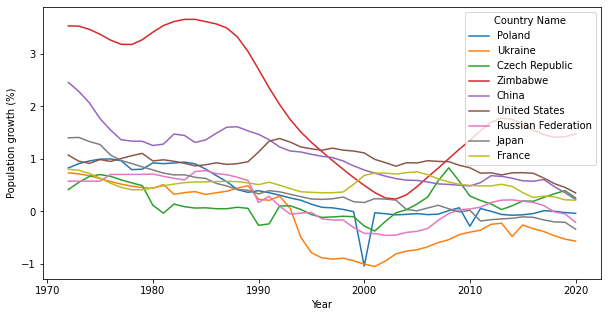

In [10]:
df_to_visualise.plot(figsize=(10, 5), ylabel="Population growth (%)")

In [11]:
df = df_to_visualise
# df = df_cleared

# draw_legend = False
draw_legend = True

In [12]:
X = df.values.T
X.shape

(9, 49)

In [13]:
y = df.columns.values
y

array(['Poland', 'Ukraine', 'Czech Republic', 'Zimbabwe', 'China',
       'United States', 'Russian Federation', 'Japan', 'France'],
      dtype=object)

In [14]:
def plot_normal(X, y, legend=False):
    plt.figure(figsize=(8, 8))
    for i in range(X.shape[0]):
        plt.scatter(X[i, 0], X[i, 1], label=y[i])

    if legend:
        plt.legend()
    plt.show()


def plot_with_names(X, y, specific="Poland"):
    plt.figure(figsize=(12, 12))

    plt.scatter(X[y != specific][:, 0], X[y != specific][:, 1])
    plt.scatter(X[y == specific][:, 0], X[y == specific][:, 1])

    for i in range(X.shape[0]):
        plt.annotate(y[i], [X[i, 0], X[i, 1]], size=7)

    # plt.legend()
    plt.show()

# Similarities (PCA)

In [15]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X)

Text(0.5, 1.0, 'Explained variance ratio')

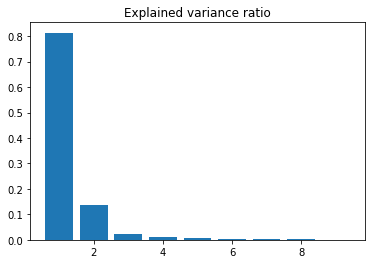

In [16]:
plt.bar(
    np.arange(1, pca.explained_variance_ratio_.shape[0] + 1),
    pca.explained_variance_ratio_,
)
plt.title("Explained variance ratio")

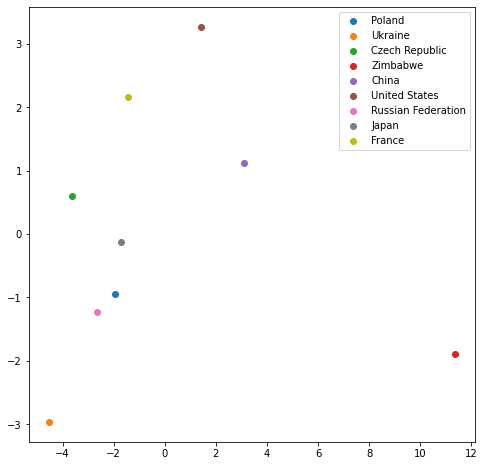

In [17]:
plot_normal(X_pca, y, legend=draw_legend)

In [18]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(kernel="rbf")
X_pca = kpca.fit_transform(X)

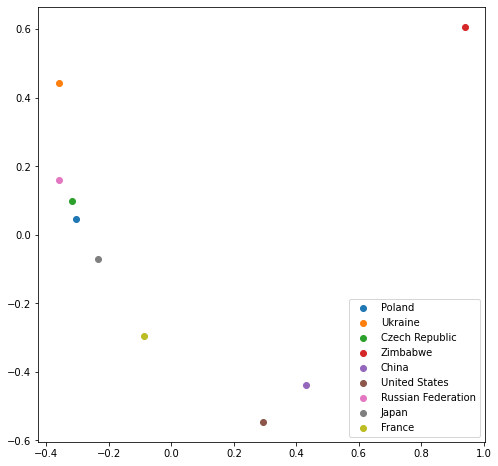

In [19]:
plot_normal(X_pca, y, legend=draw_legend)

# MDS

In [20]:
from sklearn.manifold import MDS

mds = MDS()
X_mds = mds.fit_transform(X)

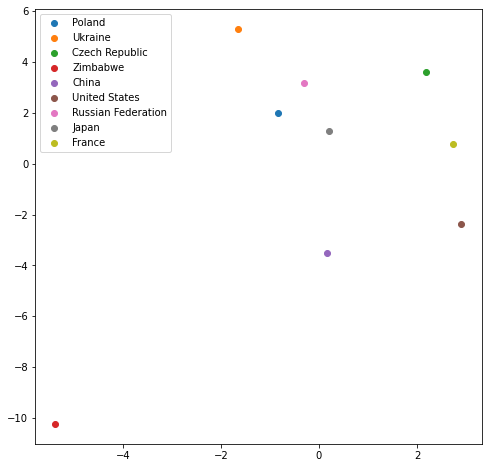

In [21]:
plot_normal(X_mds, y, legend=draw_legend)

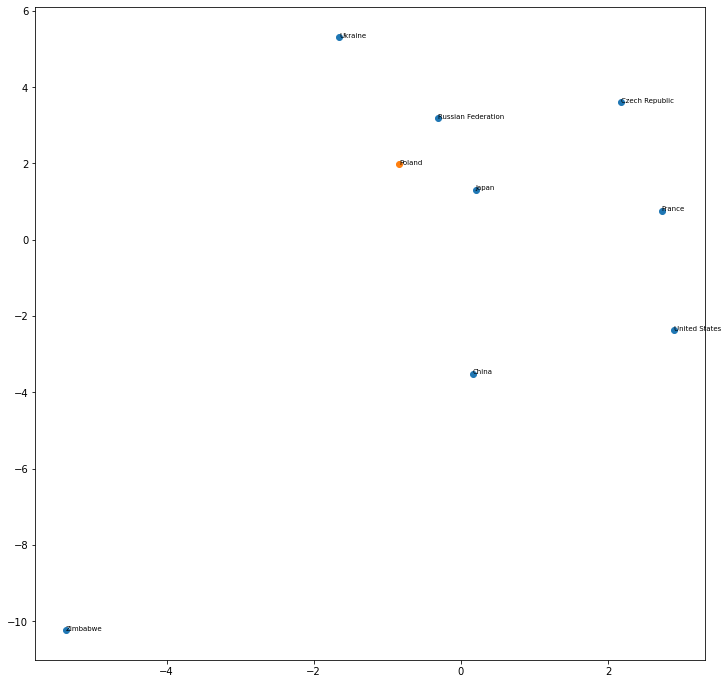

In [22]:
plot_with_names(X_mds, y)

# TSNE

In [23]:
from sklearn.manifold import TSNE

tsne = TSNE(perplexity=2)
X_tsne = tsne.fit_transform(X)

C:\Users\MatiX\Anaconda3\envs\py39\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\MatiX\Anaconda3\envs\py39\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


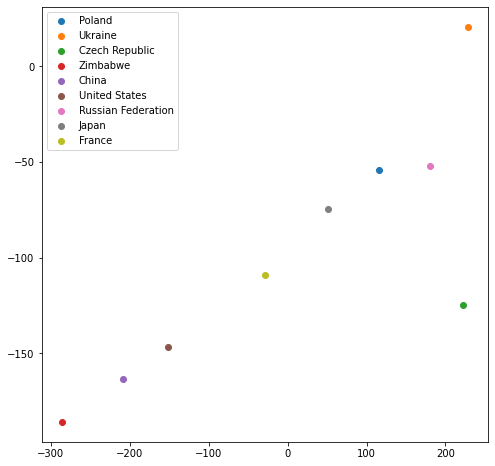

In [24]:
plot_normal(X_tsne, y, legend=draw_legend)

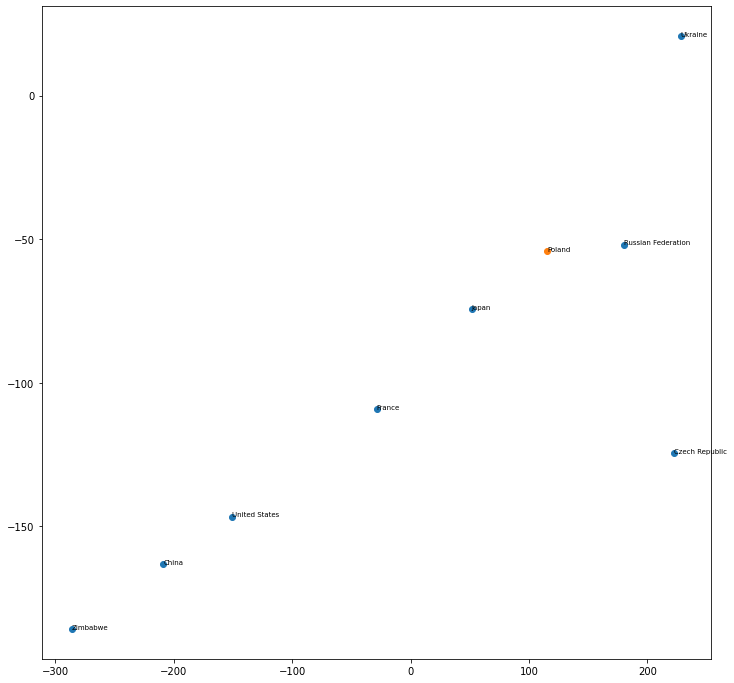

In [25]:
plot_with_names(X_tsne, y)